# Explanatory data analysis

- This is a Python base notebook  
  
Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import (train_test_split)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import altair  as alt
alt.data_transformers.disable_max_rows();

## Reading the data CSV
Read in the data CSV and store it as a pandas dataframe named `spotify_df`. 

In [2]:
spotify_df = pd.read_csv('data/spotify_data.csv', index_col = 0 )
spotify_df.head(6)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake


In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

First, we have 15 features in total, most of them are numerical features. They represent the song characteristics which are also provided by Spotify API. These features can be useful as we all have different taste of songs. Some people like upbeat music while others like moody Jazz, these characteristics of songs can be identified by different features in the data set.

Moreover, apart from the 14 numerical features, there are also two free text features `song_title` and `artist`. `artist` can be useful in the prediction as many listeners may like the songs because of the artist. Some popular singers like Taylor Swift could be more favorable these days comparing to some older generation artists. However, `song_title` may not be a critical factor for users decide whether they like or dislike a song.

Last but not least, the data set does not include any missing values.

## Class imbalance

In [4]:
spotify_df["target"].value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

The number of samples per class is around 50%, therefore it is a balanced data set.

## Data splitting 

In [5]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
print(train_df.shape)
print(test_df.shape)

(1613, 16)
(404, 16)


We have 1613 examples in training data, 404 examples in test data.

## EDA

### Any preference on artists?

#### Target = 0 (Dislike)

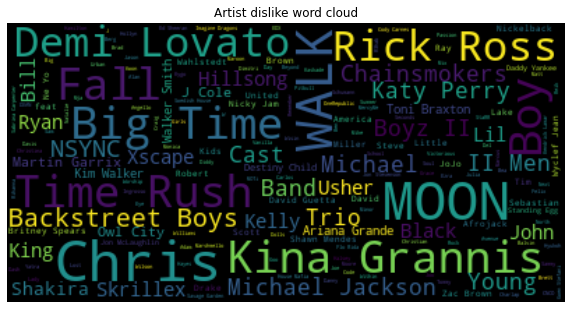

In [6]:
text_artist_dislike = train_df[train_df['target'] == 0]['artist'].str.cat(sep=' ')
wordcloud_spam = WordCloud(max_font_size=40).generate(text_artist_dislike)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Artist dislike word cloud")
plt.show()

#### Target = 1 (Like)

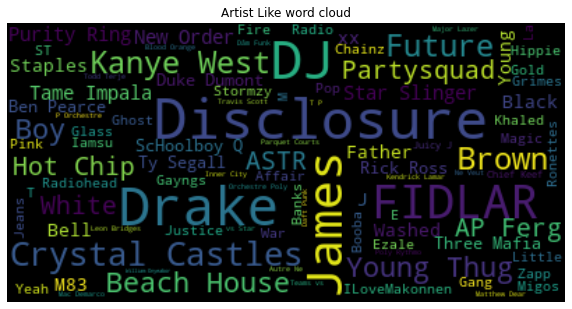

In [7]:
text_artist_like = train_df[train_df['target'] == 1]['artist'].str.cat(sep=' ')
wordcloud_spam = WordCloud(max_font_size=40).generate(text_artist_like)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Artist Like word cloud")
plt.show()

- Seems the user is more into DJ and upbeat music than pop songs.

### How about song title?

#### Target = 0 (Dislike)

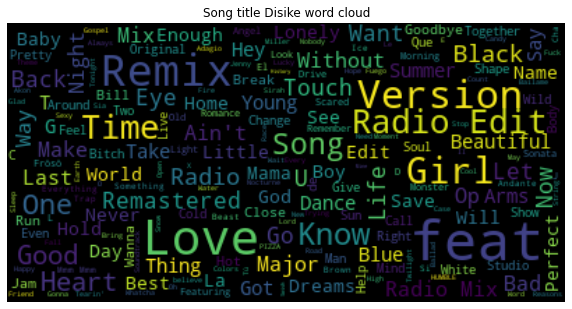

In [8]:
text_title_dislike = train_df[train_df['target'] == 0]['song_title'].str.cat(sep=' ')
wordcloud_spam = WordCloud(max_font_size=40).generate(text_title_dislike)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Song title Disike word cloud")
plt.show()

#### Target = 1 (Like)

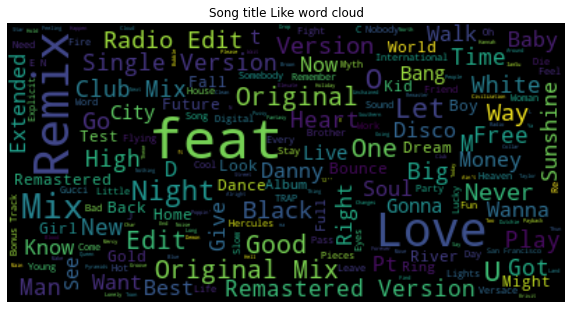

In [9]:
text_title_like = train_df[train_df['target'] == 1]['song_title'].str.cat(sep=' ')
wordcloud_spam = WordCloud(max_font_size=40).generate(text_title_like)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Song title Like word cloud")
plt.show()

- Interestingly, love appear in both of the word cloud.
- Matched with artist preference, we see working like `Mix` and `Remix`

### Which feature has the smallest range? 

In [10]:
train_df_diff = train_df.describe()
(train_df_diff.loc['max'] - train_df_diff.loc['min']).sort_values()

speechiness              0.792900
danceability             0.862000
liveness                 0.950200
valence                  0.956100
instrumentalness         0.976000
energy                   0.982200
acousticness             0.994995
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                32.790000
tempo                  171.472000
duration_ms         833918.000000
dtype: float64

- Speechiness returns the smallest value.

<br><br>

### Is there any preference between user's like and dislike by feature?

Below are histograms for some of the features, including `speechiness`, `danceability`, `liveness`, `valence`, `instrumentalness`, `energy` and `acousticness`, which show the distributions of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples.  
There are two overlaid histograms for each feature, one for target = 0 and one for target = 1. By compare the histogram of positive and negative targets for each feature, the non-overlapped area indicates that there may be user preference by feature naturally.

In [11]:
features = ['speechiness', 'danceability', 'liveness', 'valence', 'instrumentalness', 'energy', 'acousticness', 'loudness', 'tempo']
train_df_target = train_df.melt(id_vars=['target'], value_vars=features)
train_df_target['target'] = train_df_target['target'].astype('category')

In [12]:
input_dropdown = alt.binding_select(options=features, name='Feature')
selection = alt.selection_single(fields=['variable'], bind=input_dropdown, init={'variable':'danceability'})

alt.Chart(train_df_target).mark_bar(opacity = 0.8).encode(
    alt.X("value:Q", bin=alt.Bin(maxbins=50)),
    y=alt.Y('count():Q', stack=None),
    color='target:N',
    tooltip='count():Q'
).add_selection(
    selection
).transform_filter(
    selection
)

alt.Chart(...)

Select feature from the drop-down list, some of the features have obvious preferences according to the training data set.

|   Features   |         target = 0        |
|:------------:|:-------------------------:|
| danceability |     0.4 < value < 0.6     |
|    energy    |        0.2 < value        |
| acousticness |        value < 0.8        |
|   loudness   | -15 < value or -8 < value |

## Conclusion

### Can we see any patterns by feature?

We can indeed see some patterns in some features, especially for `danceability`, `energy`, `acousticness` and `loudness`.

### Which columns to include? 
I would say we can use all the features except `song_title`.

<br><br><br><br>